In [4]:
#STA130 HW4

In [ ]:
#All manually writen parts are put into individual boxes to distinguish from the AI writen ones

In [ ]:
#Pre Lec 1
#"The standard error of the mean" means taking samples from the population and calulate their means, using these means as a new sample 
#and calulate its SD. It is nothing to do with the SD of the population, which describes the spread of the population. Instead, it measures 
#the error of using the sample mean to estimate the population mean.

In [ ]:
#Pre Lec 2
#We can create that interval by using the original sample mean as the mean of the interval, and add/subtract 1.96 times SE as the 
#maximum/minimum of the interval, by the nature of the normal distribution (which we assume the bootstraped means form)
#that should cover the middle 95% of bootstraped means.

In [ ]:
#Pre Lec 3
#Since we know all the bootstraped sample means, we simply take the middle 95% of them.

In [ ]:
#Pre Lec 4
#The following codes are mainly done by GPT. Since it works well, I didn't remove or change much of the code, including the notes

In [ ]:
#first we made a convinient sample by ramdom number generater

In [ ]:
import numpy as np

# Generate 20 random numbers between 1 and 100
random_sample = np.random.randint(1, 101, 20)
random_sample

In [ ]:
#Then we do bootstraping, calculate all the means of these bootstraped samples and take the middle 95% of the results.

In [11]:
# Define the correct sample provided by the user
sample = [57, 35, 34, 58, 61, 6, 61, 49, 98, 68, 32, 14, 11, 13, 73, 93, 40, 8, 15, 4]

# Number of bootstrap samples
n_bootstraps = 10000
boot_means = np.empty(n_bootstraps)

# Perform bootstrapping by resampling with replacement and calculating the mean for each resample
for i in range(n_bootstraps):
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    boot_means[i] = np.mean(boot_sample)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles) for the mean
ci_mean_lower = np.percentile(boot_means, 2.5)
ci_mean_upper = np.percentile(boot_means, 97.5)

ci_mean_lower, ci_mean_upper


(29.2, 54.35)

In [ ]:
#Then we calculate the SD of these samples. The approach we take is pretty much as same as the previous code.

In [12]:
# Using the given sample to recalculate the 95% confidence interval for the population standard deviation

# Define the given sample
sample = [57, 35, 34, 58, 61, 6, 61, 49, 98, 68, 32, 14, 11, 13, 73, 93, 40, 8, 15, 4]

# Number of bootstrap samples
n_bootstraps = 10000
boot_stds = np.empty(n_bootstraps)

# Perform bootstrapping by resampling with replacement and calculating the standard deviation for each resample
for i in range(n_bootstraps):
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    boot_stds[i] = np.std(boot_sample, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles) for the population standard deviation
ci_sd_lower = np.percentile(boot_stds, 2.5)
ci_sd_upper = np.percentile(boot_stds, 97.5)

ci_sd_lower, ci_sd_upper


(21.2163788942466, 34.67922079497325)

In [ ]:
#Post Lec 1
#Because we can NEVER know the population parameters with only samples we have, the best guess we can take is a coffidence interval
#calculated based on the sample statistic to estimate the population parameters. The confidence interval is not only ambiguous,
#but also have a small chance to go wrong.(5% chance for a 95% confidence interval). But it is the best guess we have.

In [ ]:
#Post Lec 2
#Q1: Bootstraping is: get a sample from the population, pick some elements from the sample with replacement to make a new sample of the
#same size, repeat making these simulated samples until we have enough of them; use these "fictional samples" to estimate the parameters
#we want.

#Q2:Bootstraping is using when you need more samples than you have in order to  estimate a parameter. It is a cheap way to estimate sampling.

#Q3:We can apply a confidence interval test on the hypothesis to check whether it is sufficient to reject it.The process of creating a 
#confidence interval have been shown in Pre Lec 4. And the additional thing we do is to check whether h0 falls into the confidence interval. 
#If yes,then we have no reason to reject H0, vise versa.

In [ ]:
#Post Lec 3
#Here we assume that H0 is "population mean is zero." Even if the sample mean itself is not zero, because the sample statistics can't 
#accurately reflect the population parameters, we do not know whether H0 is ture or not with only sample statistics.
#Thus, we use bootstraping (or use formula directly) to make a confidence interval. This means, in 95% (or 99% maybe, dependingon situations)
#of different dataset, when we take a sample as observed, the population means falls into the interval. As this chance is high,
#when zero (as H0 points out) falls into the interval, it is quite possible thgat H0 is ture, and we have no reason to reject it.
#If zero falls out of the interval, we would find H0 is false in more than 95% of all possible situations, and thus we should reject H0.

In [ ]:
#Post Lec 4: the vaccine problem

In [ ]:
#First we define all the statistics listed in the csv file.
#then we made a box plot and the scatter plot to measure the status of patients before and after the vaccination.
#This is not formal prove whether the vaccine works or not, but it helps us to see the problem visually

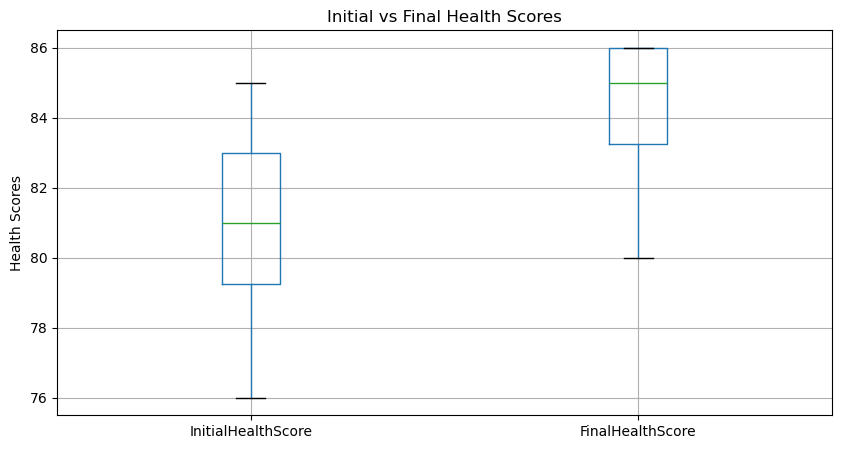

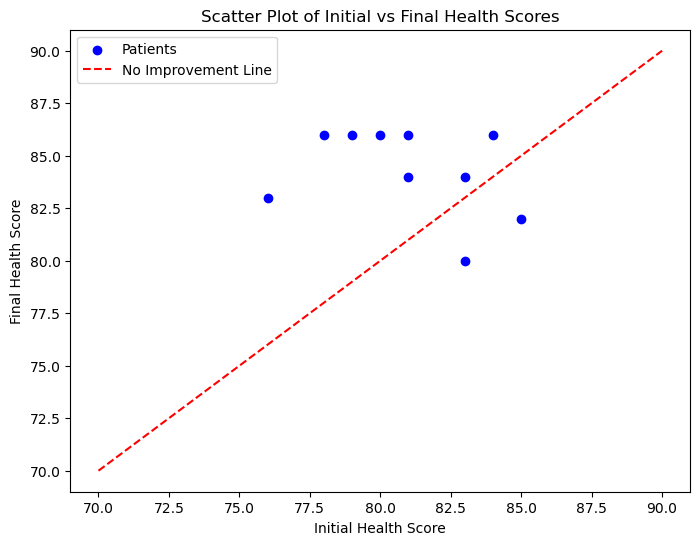

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data from the provided information
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the difference between final and initial health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot initial vs final health scores
plt.figure(figsize=(10, 5))

# Box plot for initial and final health scores
df[['InitialHealthScore', 'FinalHealthScore']].boxplot()
plt.title('Initial vs Final Health Scores')
plt.ylabel('Health Scores')

plt.show()

# Scatter plot to visualize the relationship between Initial and Final health scores
plt.figure(figsize=(8, 6))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='b', label='Patients')
plt.plot([70, 90], [70, 90], color='r', linestyle='--', label='No Improvement Line')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Scatter Plot of Initial vs Final Health Scores')
plt.legend()

plt.show()


In [ ]:
#As seen in the plots, the vaccine seems to work well, yet we still need a hypothesis test to see whether it works formally

In [ ]:
#Make H0: vaccine is not working. Which means, the average improvement after the vaccination is samller than or equal to 0
#Since we only have a small sample, bootstrap to create simulated samples and calculate 95% confidence interval

In [2]:
# Bootstrapping to calculate the confidence interval for the mean difference in health scores

# Define the number of bootstrap samples
n_bootstraps = 10000

# Extract the health score differences
differences = df['HealthScoreDifference'].values

# Perform bootstrapping
boot_means = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    boot_sample = np.random.choice(differences, size=len(differences), replace=True)
    boot_means[i] = np.mean(boot_sample)

# Calculate the 95% confidence interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Display the results
ci_lower, ci_upper


(0.8, 5.5)

In [ ]:
#As "smaller or equal to zero" is not included in the interval, we are 95% confidence to say that H0 is wrong. Thus we reject H0
#and proved that the vaccine is likely to work well.

In [ ]:
#Post Lec 5
#Yes, I fully understand all the concept in the lecture and is ready for the tut and the next lecture.